In [1]:
from obspy import * 
from pandas import *
from tqdm.notebook import tqdm
from datetime import datetime
from andbro__querrySeismoData import __querrySeismoData

import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
config = {}

# config['host'] = "brotzer" # ""andbro"

# config['year'] = "2019"

# config['seed'] = "BW.ROMY.10.HJZ"
# config['seed'] = "BW.DROMY..FJZ"

config['tbeg'] = UTCDateTime("2019-09-15 00:00")
config['tend'] = UTCDateTime("2019-09-30 00:00")

## time perio 1
config['tbeg'] = UTCDateTime("2019-11-02 12:00")
config['tend'] = UTCDateTime("2019-11-02 20:00")


## time period 2
# config['tbeg'] = UTCDateTime("2019-09-17 17:00")
# config['tend'] = UTCDateTime("2019-09-18 00:00")

config['repository'] = "george"
# config['doys'] = 319

In [32]:
# doy = 319

st = Stream()

for comp in ['z','u','v','w']:
    if comp == 'z':
        loc = "10"
    else:
        loc = ""
        
    config['seed'] = f"BW.ROMY.{loc}.HJ{comp.upper()}"

    st0, inv = __querrySeismoData(
                            seed_id=config.get("seed"),
                            starttime=config.get("tbeg"),
                            endtime=config.get("tend"),
                            repository=config.get("repository"),
                            path=None,
                            restitute=True,
                            detail=True,
                            fill_value=None,
                            )
    st.append(st0[0])

st = st.trim(config['tbeg']+300, config['tend']-300)
st

OUT: VEL
pre-filter: [0.001, 0.005, 95, 100]


1 Trace(s) in Stream:
BW.ROMY.10.HJZ | 2019-11-02T11:59:59.997999Z - 2019-11-02T19:59:59.997999Z | 100.0 Hz, 2880001 samples

OUT: VEL
pre-filter: [0.001, 0.005, 95, 100]


2 Trace(s) in Stream:
BW.ROMY.10.HJZ | 2019-11-02T11:59:59.997999Z - 2019-11-02T19:59:59.997999Z | 100.0 Hz, 2880001 samples
BW.ROMY..HJU   | 2019-11-02T12:00:00.000799Z - 2019-11-02T20:00:00.000799Z | 100.0 Hz, 2880001 samples

OUT: VEL
pre-filter: [0.001, 0.005, 95, 100]


3 Trace(s) in Stream:
BW.ROMY.10.HJZ | 2019-11-02T11:59:59.997999Z - 2019-11-02T19:59:59.997999Z | 100.0 Hz, 2880001 samples
BW.ROMY..HJU   | 2019-11-02T12:00:00.000799Z - 2019-11-02T20:00:00.000799Z | 100.0 Hz, 2880001 samples
BW.ROMY..HJV   | 2019-11-02T11:59:59.996800Z - 2019-11-02T19:59:59.996800Z | 100.0 Hz, 2880001 samples

OUT: VEL
pre-filter: [0.001, 0.005, 95, 100]


4 Trace(s) in Stream:
BW.ROMY.10.HJZ | 2019-11-02T11:59:59.997999Z - 2019-11-02T19:59:59.997999Z | 100.0 Hz, 2880001 samples
BW.ROMY..HJU   | 2019-11-02T12:00:00.000799Z - 2019-11-02T20:00:00.000799Z | 100.0 Hz, 2880001 samples
BW.ROMY..HJV   | 2019-11-02T11:59:59.996800Z - 2019-11-02T19:59:59.996800Z | 100.0 Hz, 2880001 samples
BW.ROMY..HJW   | 2019-11-02T12:00:00.000600Z - 2019-11-02T20:00:00.000600Z | 100.0 Hz, 2880001 samples

4 Trace(s) in Stream:
BW.ROMY.10.HJZ | 2019-11-02T12:04:59.997999Z - 2019-11-02T19:54:59.997999Z | 100.0 Hz, 2820001 samples
BW.ROMY..HJU   | 2019-11-02T12:05:00.000799Z - 2019-11-02T19:55:00.000799Z | 100.0 Hz, 2820001 samples
BW.ROMY..HJV   | 2019-11-02T12:04:59.996800Z - 2019-11-02T19:54:59.996800Z | 100.0 Hz, 2820001 samples
BW.ROMY..HJW   | 2019-11-02T12:05:00.000600Z - 2019-11-02T19:55:00.000600Z | 100.0 Hz, 2820001 samples

In [33]:
st.detrend('demean')

# st.taper(0.1)

# st.filter("bandpass", freqmin=0.001, freqmax=10.0, corners=4, zerophase=True)

# st.normalize()

4 Trace(s) in Stream:
BW.ROMY.10.HJZ | 2019-11-02T12:04:59.997999Z - 2019-11-02T19:54:59.997999Z | 100.0 Hz, 2820001 samples
BW.ROMY..HJU   | 2019-11-02T12:05:00.000799Z - 2019-11-02T19:55:00.000799Z | 100.0 Hz, 2820001 samples
BW.ROMY..HJV   | 2019-11-02T12:04:59.996800Z - 2019-11-02T19:54:59.996800Z | 100.0 Hz, 2820001 samples
BW.ROMY..HJW   | 2019-11-02T12:05:00.000600Z - 2019-11-02T19:55:00.000600Z | 100.0 Hz, 2820001 samples

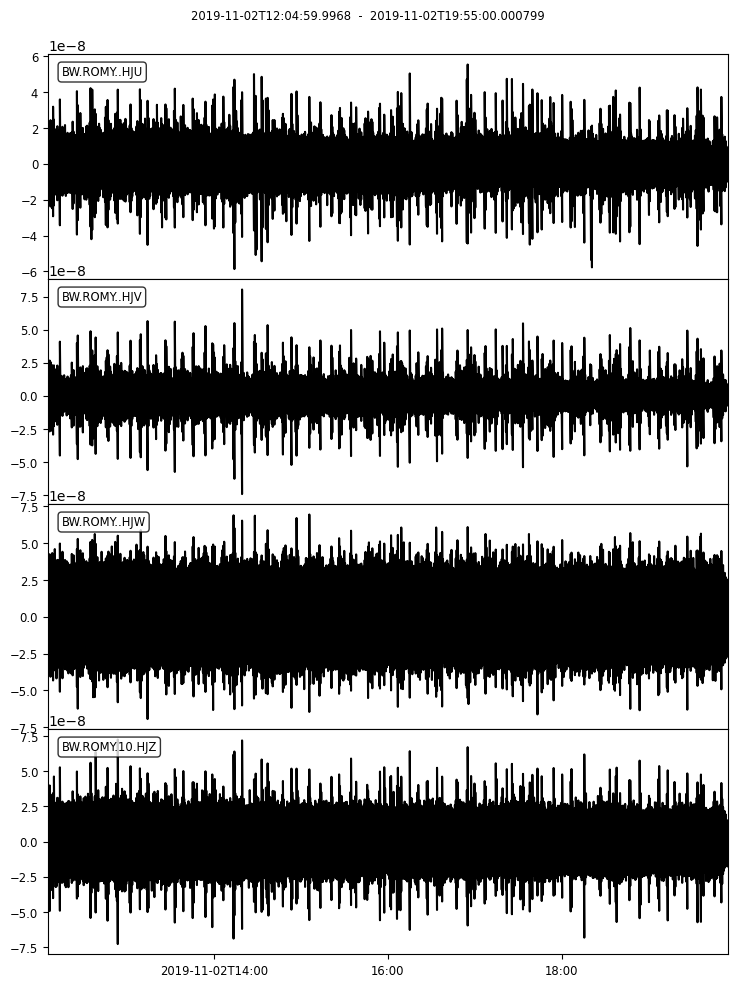

In [34]:
st.plot(equal_scale=False);

In [56]:
import obspy.signal.rotate as rot

z, n, e = rot.rotate2zne(st.select(channel="*U")[0].data,
                     0.0,
                     70.5,
                     st.select(channel="*V")[0].data,
                     120.0,
                     -19.5,
                     st.select(channel="*W")[0].data,
                     240.0,
                     -19.5,
                     inverse=False)

In [57]:
st_rot = st.copy()

st_rot[1].data = z
st_rot[2].data = n
st_rot[3].data = e

st_rot[1].stats.channel = "BJZ"
st_rot[2].stats.channel = "BJN"
st_rot[3].stats.channel = "BJE"

In [58]:
st_rot

4 Trace(s) in Stream:
BW.ROMY.10.HJZ | 2019-11-02T12:04:59.997999Z - 2019-11-02T19:54:59.997999Z | 100.0 Hz, 2820001 samples
BW.ROMY..BJZ   | 2019-11-02T12:05:00.000799Z - 2019-11-02T19:55:00.000799Z | 100.0 Hz, 2820001 samples
BW.ROMY..BJN   | 2019-11-02T12:04:59.996800Z - 2019-11-02T19:54:59.996800Z | 100.0 Hz, 2820001 samples
BW.ROMY..BJE   | 2019-11-02T12:05:00.000600Z - 2019-11-02T19:55:00.000600Z | 100.0 Hz, 2820001 samples

In [59]:
# H = np.sqrt(st_rot[1].data**2 + st_rot[2].data**2)

In [60]:
from scipy import signal

freqs, psd = [], []
seg = 256*100

for tr in st_rot:
    if tr.stats.location == "10":    
        continue
        
    if np.isnan(tr.data).any():
        print(" -> found NaN!")
        data = [0 if not np.isfinite(i) else i for i in tr.data]
    else:
        data = tr.data
    
    print(tr.stats.channel)
    freq0, psd0 = signal.welch(
                                data, 
                                fs=1/st_rot[0].stats.delta,
                                window='hann',
                                nperseg=int(seg),
                                noverlap=int(seg/2),
                                nfft=None,
                                detrend='constant',
                                return_onesided=True,
                                scaling='density',
                                axis=-1,
                                average='mean',
                           )
    if np.isnan(psd0).all():
        print(" -> all NaN!")
    freqs.append(freq0)
    psd.append(psd0)

BJZ
BJN
BJE


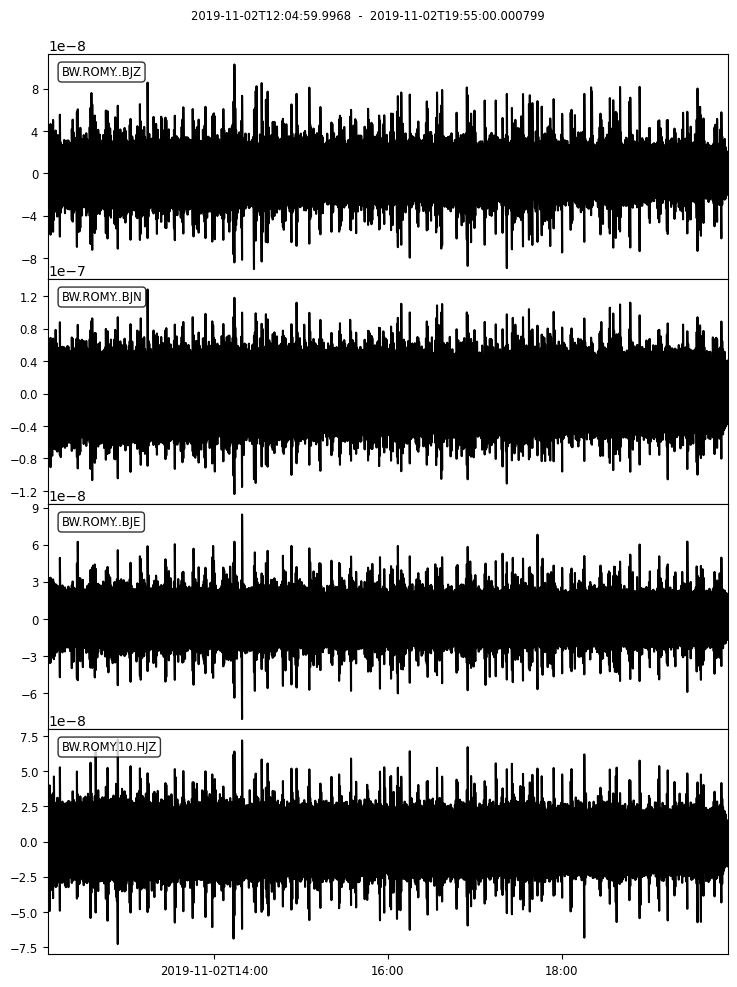

In [61]:
st_rot.plot(equal_scale=False);

In [62]:
freq_Z, psd_Z = signal.welch(
                            st.select(location="10",channel="*Z")[0].data, 
                            fs=1/st0[0].stats.delta,
                            window='hann',
                            nperseg=int(seg),
                            noverlap=int(seg/2),
                            nfft=None,
                            detrend='constant',
                            return_onesided=True,
                            scaling='density',
                            axis=-1,
                            average='mean',
                       )

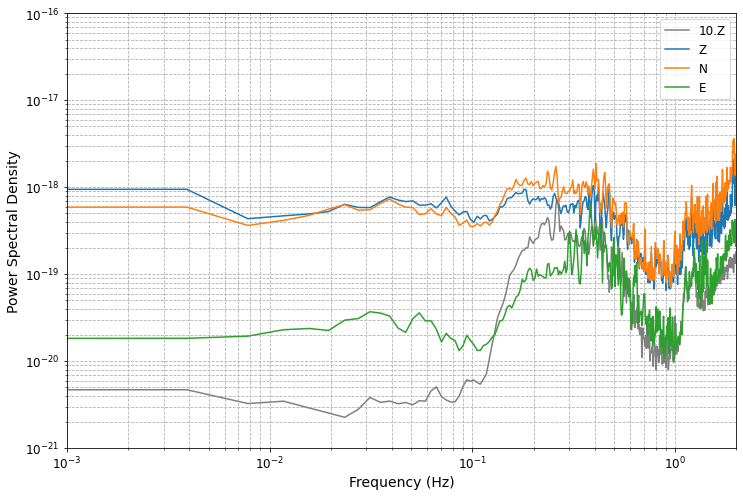

In [63]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

font = 14

ax.plot(freq_Z, psd_Z, label="10.Z", color="grey")

ax.plot(freqs[0], psd[0], label="Z")
ax.plot(freqs[1], psd[1], label="N")
ax.plot(freqs[2], psd[2], label="E")



# ax.set_title(f"PSD for {sta}.{cha} ({round(duration/60,2)} min)", fontsize=font+2)
ax.set_xlabel("Frequency (Hz)", fontsize=font)
ax.set_ylabel("Power Spectral Density", fontsize=font)

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(fontsize=font-2)

ax.grid(True, which="both", ls="--")

ax.tick_params(labelsize=font-2)

ax.set_xlim(1e-3, 2)
ax.set_ylim(1e-21, 1e-16)

# ax.set_xlim(1e-1, 3e3)

plt.show();

In [29]:
from andbro__savefig import __savefig

# __savefig(fig, f"/home/brotzer/Documents/ROMY/QualityCheck/",f"CheckSamples_{config['seed'].split('.')[1]}_{config['seed'].split('.')[3]}_2021", mode="png")

### Write to File

In [64]:
# df_out = DataFrame()

# df_out['frequencies'] = freqs[0]
# df_out['z_psd'] = psd[0]
# df_out['n_psd'] = psd[1]
# df_out['e_psd'] = psd[2]


# df_out.to_pickle("/export/data/LNM/data/ROMY_ZNE/"+"romy_zne.pkl")